# TASK 2
Create a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information. You
can use techniques like TF-IDF or word embeddings with classifiers
such as Naive Bayes, Logistic Regression, or Support Vector
Machines.


In [ ]:
#importing the required libraries

import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv(r"C:\Users\PINKY\OneDrive\Desktop\Movie-genre-prediction\movie\Genre Classification Dataset\description.txt")       #loading the data

In [4]:
df

,Train data:
0,ID ::: TITLE ::: GENRE ::: DESCRIPTION
1,ID ::: TITLE ::: GENRE ::: DESCRIPTION
2,ID ::: TITLE ::: GENRE ::: DESCRIPTION
3,ID ::: TITLE ::: GENRE ::: DESCRIPTION
4,Test data:
5,ID ::: TITLE ::: DESCRIPTION
6,ID ::: TITLE ::: DESCRIPTION
7,ID ::: TITLE ::: DESCRIPTION
8,ID ::: TITLE ::: DESCRIPTION
9,Source:


In [ ]:
#reading train data and converting it to dataframe
train_data=r"C:\Users\PINKY\OneDrive\Desktop\Movie-genre-prediction\movie\Genre Classification Dataset\train_data.txt"
train_df = pd.read_csv(train_data, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [ ]:
#reading test data and converting it into dataframe
test_data=r"C:\Users\PINKY\OneDrive\Desktop\Movie-genre-prediction\movie\Genre Classification Dataset\test_data.txt"
test_df= pd.read_csv(test_data, sep=':::', names=['Id', 'Title', 'Description'], engine='python')

In [ ]:
#reading test data solution and converting it into dataframe
test_sol=r"C:\Users\PINKY\OneDrive\Desktop\Movie-genre-prediction\movie\Genre Classification Dataset\test_data_solution.txt"
test_sol_df=pd.read_csv(test_sol, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [45]:
#Train data
train_df.head(5)

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [46]:
#Test data
test_df.head(5)

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [47]:
#Test solution data
test_sol_df.head(5)

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


# EDA + Visualization

In [ ]:
#importing the required libraries

import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\PINKY\AppData\Local\Temp\ipykernel_5600\3116992791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, y='Genre', order=train_df['Genre'].value_counts().index, palette='viridis')
C:\Users\PINKY\AppData\Local\Temp\ipykernel_5600\3116992791.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='viridis')


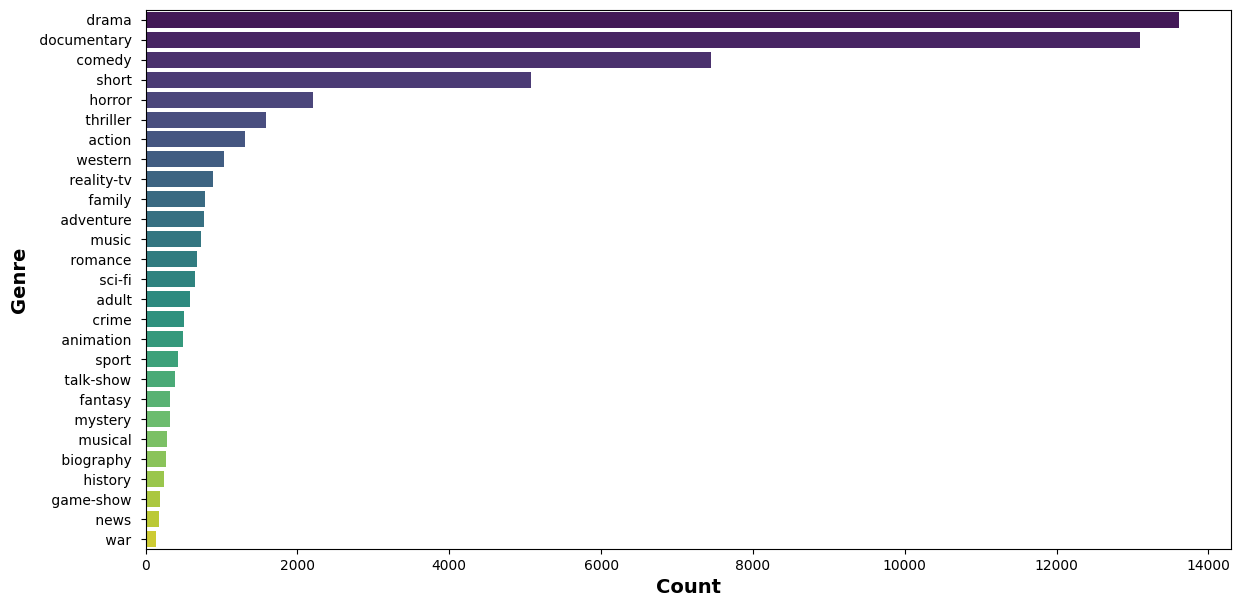

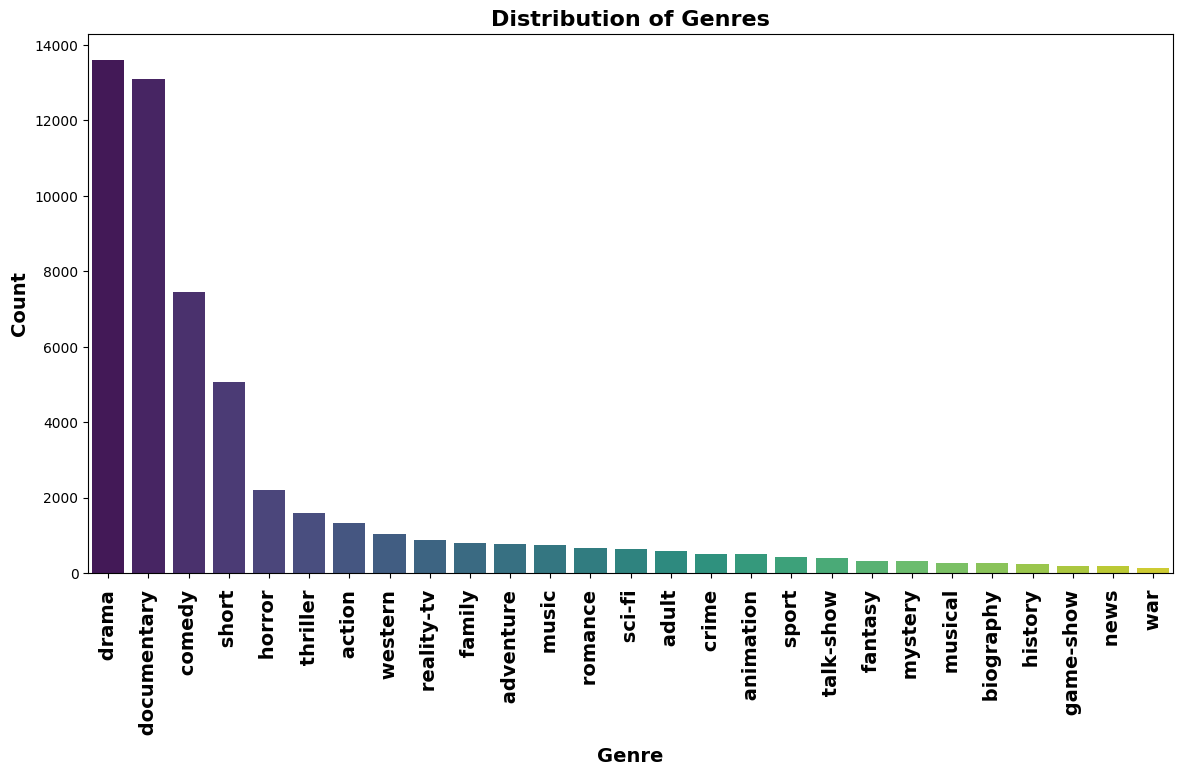

In [ ]:
#Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(data=train_df, y='Genre', order=train_df['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

#Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = train_df['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

# Data preprocessing and text cleaning

In [53]:
#importing the required libraries

import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

In [ ]:
#Initializing the stemmer and stop words

stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

In [55]:
#Function for preprocessiing the text for classification

def cleaned_text(text):
    text=text.lower()                                                               #conversion from upper case to lower case
    text=re.sub(r'@\S+', '', text)                                                  #removes the twitter handles
    text=re.sub(r'http\S+', '', text)                                               #removes the url
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)                                        #will only keep characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')                               #will keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')                              #Removes stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()                                     #Will remove repeated/leading/trailing spaces
    return text


<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
C:\Users\PINKY\AppData\Local\Temp\ipykernel_5600\620293264.py:14: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s[\s]+", " ", text).strip()                                     #Will remove repeated/leading/trailing spaces


In [57]:
#Apply the cleaned_text function to the 'Description' column in the training and test data
train_df['Text_cleaning'] = train_df['Description'].apply(cleaned_text)
test_df['Text_cleaning'] = test_df['Description'].apply(cleaned_text)

In [58]:
#calculating the lenght of cleaned_text
train_df['length_Text_cleaning'] = train_df['Text_cleaning'].apply(len)

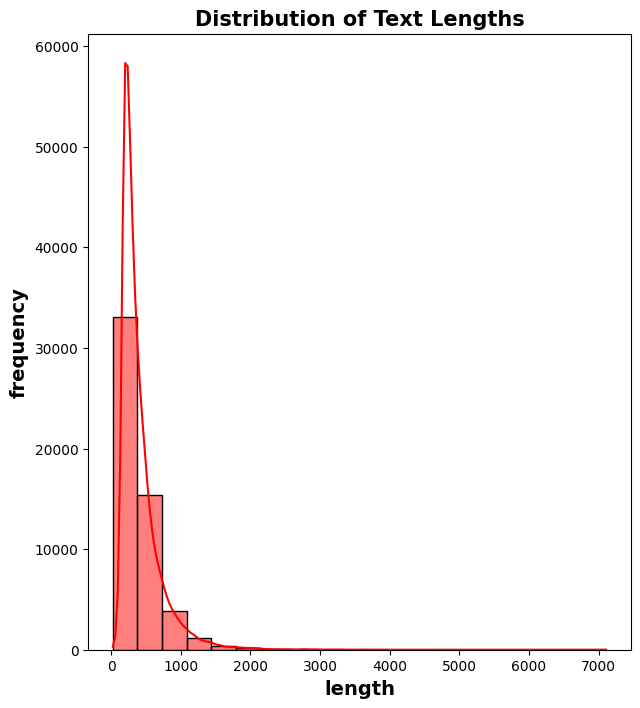

In [66]:
#visualize the distribution of text lengths
plt.figure(figsize=(7,8))
sns.histplot(data=train_df, x='length_Text_cleaning', bins=20, kde=True, color='red')
plt.xlabel('length', fontsize=14, fontweight='bold')
plt.ylabel('frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Text Lengths', fontsize=15, fontweight='bold')
plt.show()

# Text vectorization

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
#Using Tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_df['Text_cleaning'])
X_test = tfidf_vectorizer.transform(test_df['Text_cleaning'])

# Train model ( Linear SVC (SVM))

In [70]:
#importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [71]:
#splitting of training and testing data
X = X_train
y = train_df['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#using linear svc
model=LinearSVC()
model.fit(X_train,y_train)          #model training
y_pred=model.predict(X_val)          #predict

accuracy = accuracy_score(y_val, y_pred)            #accuracy
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.5883980448215439
               precision    recall  f1-score   support

      action        0.48      0.35      0.40       263
       adult        0.76      0.43      0.55       112
   adventure        0.51      0.22      0.31       139
   animation        0.34      0.10      0.15       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.59      0.56      1443
       crime        0.32      0.07      0.11       107
 documentary        0.69      0.83      0.75      2659
       drama        0.57      0.73      0.64      2697
      family        0.38      0.17      0.23       150
     fantasy        0.09      0.01      0.02        74
   game-show        0.82      0.68      0.74        40
     history        0.50      0.02      0.04        45
      horror        0.65      0.67      0.66       431
       music        0.61      0.56      0.59       144
     musical        0.50      0.06      0.11        50
     mystery        0.33

In [72]:
#Now making predictions on test data

X_test_pred=model.predict(X_test)
test_df['Predicted_Genre']=X_test_pred

In [73]:
test_df.head(5)

,Id,Title,Description,Text_cleaning,Predicted_Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...,comedy
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...,drama


In [ ]:
test_df.to_csv(r"C:\Users\PINKY\OneDrive\Desktop\Movie-genre-prediction\movie\Genre Classification Dataset\predicted_genres.csv", index=False)           # Save the test_df DataFrame with predicted genres to a csv file
print(test_df)


          Id                             Title  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                             Description  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    

# Test cases

In [80]:
def predict_genre(text, model, vectorizer):
    cleaned = cleaned_text(text)            #clean the input text/description

    vector = tfidf_vectorizer.transform([cleaned])      #perform tfidf vectorizer
    
    genre = model.predict(vector)[0]                        #prediction
    
    return genre

#Test case / Example
movie_description = "A spaceship crew lands on a mysterious planet and encounters an alien species."
predicted_genre = predict_genre(movie_description, model, tfidf_vectorizer)
print(f"Predicted Genre: {predicted_genre}")


Predicted Genre:  sci-fi 
